In [517]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,skew
from scipy import stats
from math import ceil
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [518]:
# Reading csv file and making'Id' as Index
df_train = pd.read_csv('train.csv',index_col = 'Id')
df_test = pd.read_csv('test.csv',index_col = 'Id')

In [519]:
pd.set_option('display.max_columns', 999)

In [520]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [338]:
df_train.shape

(1460, 80)

In [339]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [340]:
df_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [341]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [342]:
#Categorical Data
df_train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [343]:
total = df_train.isnull().sum().sort_values(ascending=False)

In [521]:
df_train.info

<bound method DataFrame.info of       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour U

In [344]:
total.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
RoofMatl           0
dtype: int64

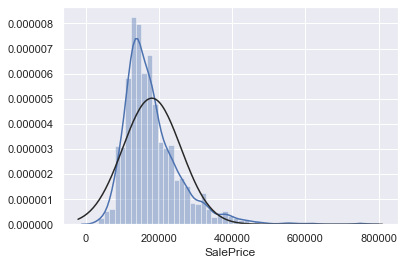

In [345]:
#Removing Skewness from Sales Price
# Initial Distribution
sns.distplot(df_train['SalePrice'], fit=norm);

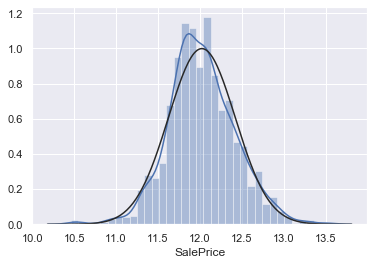

In [346]:
#After Transformation
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])
sns.distplot(df_train['SalePrice'] , fit=norm);

In [347]:
for col in ('LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'):
    df_train[col].fillna(df_train[col].median(),inplace=True)

In [348]:
# correlation matrix against the Target Variable
corr_matrix = df_train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.426776
BsmtFinSF1       0.372023
LotFrontage      0.335292
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

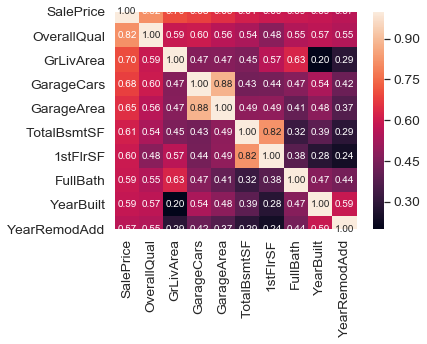

In [349]:
#saleprice correlation matrix heatmap
k = 10 #number of variables for heatmap
corrmat = df_train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

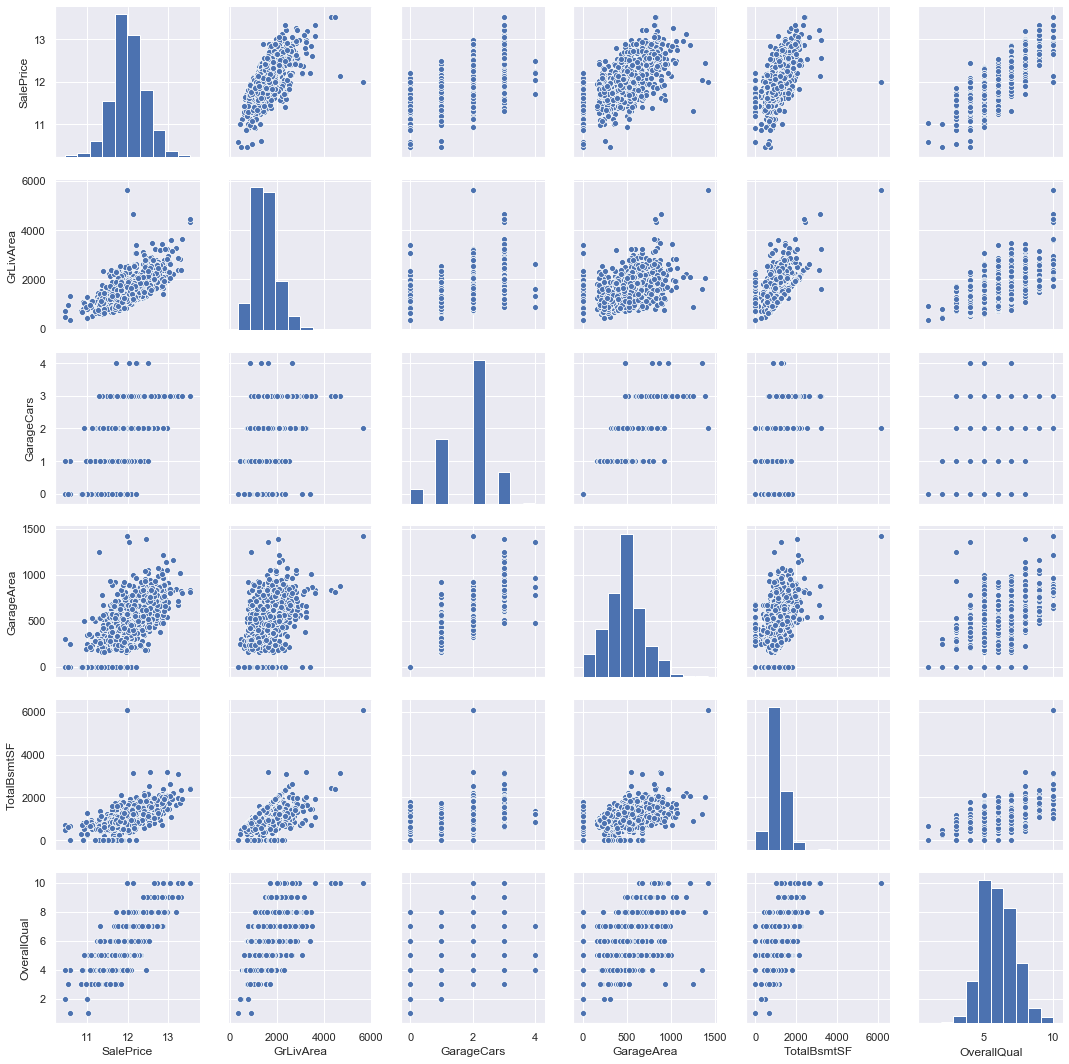

In [350]:
## PAIR PLOT for highly corelated attributes

sns.set()
cols = ['SalePrice',  'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF', 'OverallQual']
sns.pairplot(df_train[cols], height = 2.5)
plt.show()


In [351]:
# Pandas fillna method to fill missing values with None
for col in ('MiscFeature', 'Alley', 'Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna('None')

In [352]:
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].fillna(df_train['LotFrontage'].median())

In [353]:
# Filling 0 for GarageYrBlt since it depicts No Garage for missing values
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)
df_train['BsmtFullBath'] = df_train['BsmtFullBath'].fillna(0)
df_train['BsmtHalfBath'] = df_train['BsmtHalfBath'].fillna(0)
df_train['GarageArea'] = df_train['GarageArea'].fillna(0)
df_train['GarageCars'] = df_train['GarageCars'].fillna(0)
df_train['BsmtFinSF1'] = df_train['BsmtFinSF1'].fillna(0)
df_train['BsmtFinSF2'] = df_train['BsmtFinSF2'].fillna(0)
df_train['BsmtUnfSF'] = df_train['BsmtUnfSF'].fillna(0)
df_train['TotalBsmtSF'] = df_train['TotalBsmtSF'].fillna(0)
df_train['BsmtFullBath'] = df_train['BsmtFullBath'].fillna(0)
df_train['BsmtHalfBath'] = df_train['BsmtHalfBath'].fillna(0)

In [354]:
#Filling *0* for Masonary Veener Area because its NA and Type as *None* meaning not present for these houses
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

In [355]:
# IMPUTATION BY MODE
df_train["Exterior1st"].fillna(df_train["Exterior1st"].mode()[0], inplace = True)
df_train["Exterior2nd"].fillna(df_train["Exterior2nd"].mode()[0], inplace = True)
df_train["Neighborhood"].fillna(df_train["Neighborhood"].mode()[0], inplace=True) 
df_train["KitchenQual"].fillna(df_train["KitchenQual"].mode()[0], inplace=True) 
df_train["MSZoning"].fillna(df_train["MSZoning"].mode()[0], inplace = True)
df_train["Functional"].fillna(df_train["Functional"].mode()[0], inplace=True) 
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

In [356]:
#Selected outliers from above pair plotiing
outliers = {"LotArea": 150000, "BsmtFinSF1": 4000, "TotalBsmtSF": 6000, 
            "1stFlrSF": 4000, "GrLivArea": 5000}

In [357]:
#Clean Outliers
def clean_outliers(df, outliers):
    for col in outliers:
        df = df[df[col] < outliers[col]]
    return df

print("Before cleaning: %d" % len(df_train))
df_train = clean_outliers(df_train, outliers)
print("After cleaning: %d" % len(df_train))

Before cleaning: 1460
After cleaning: 1456


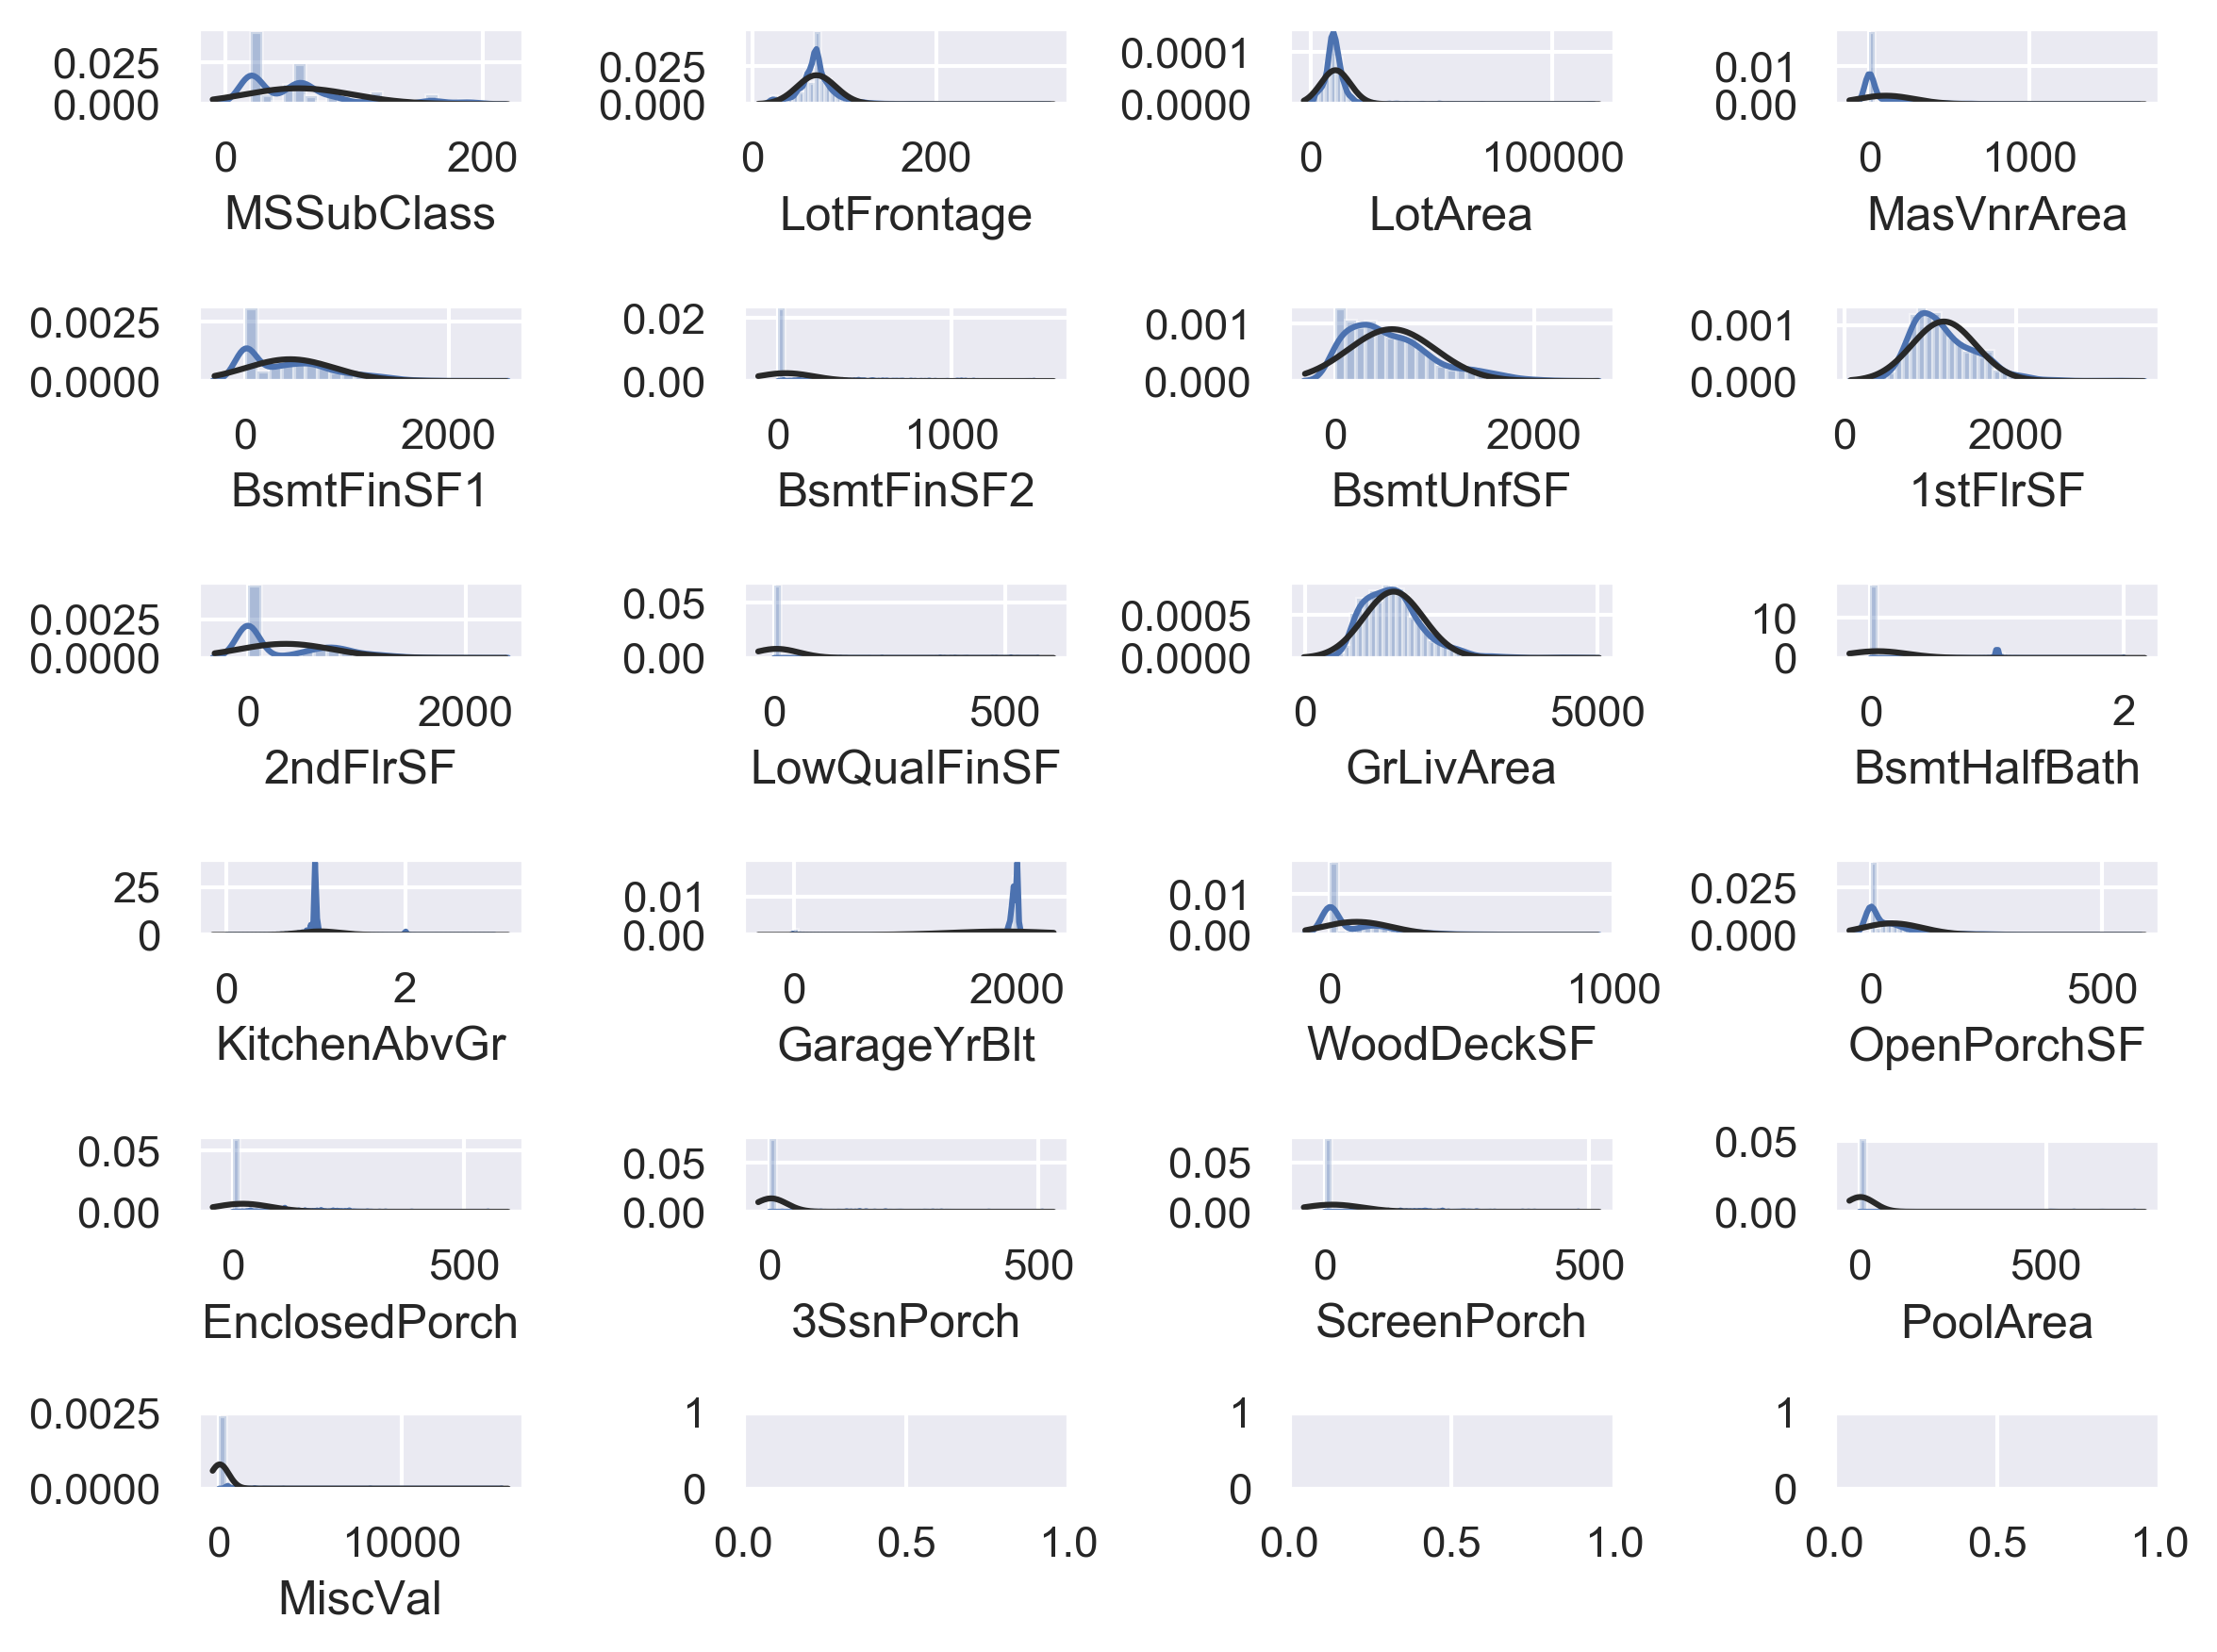

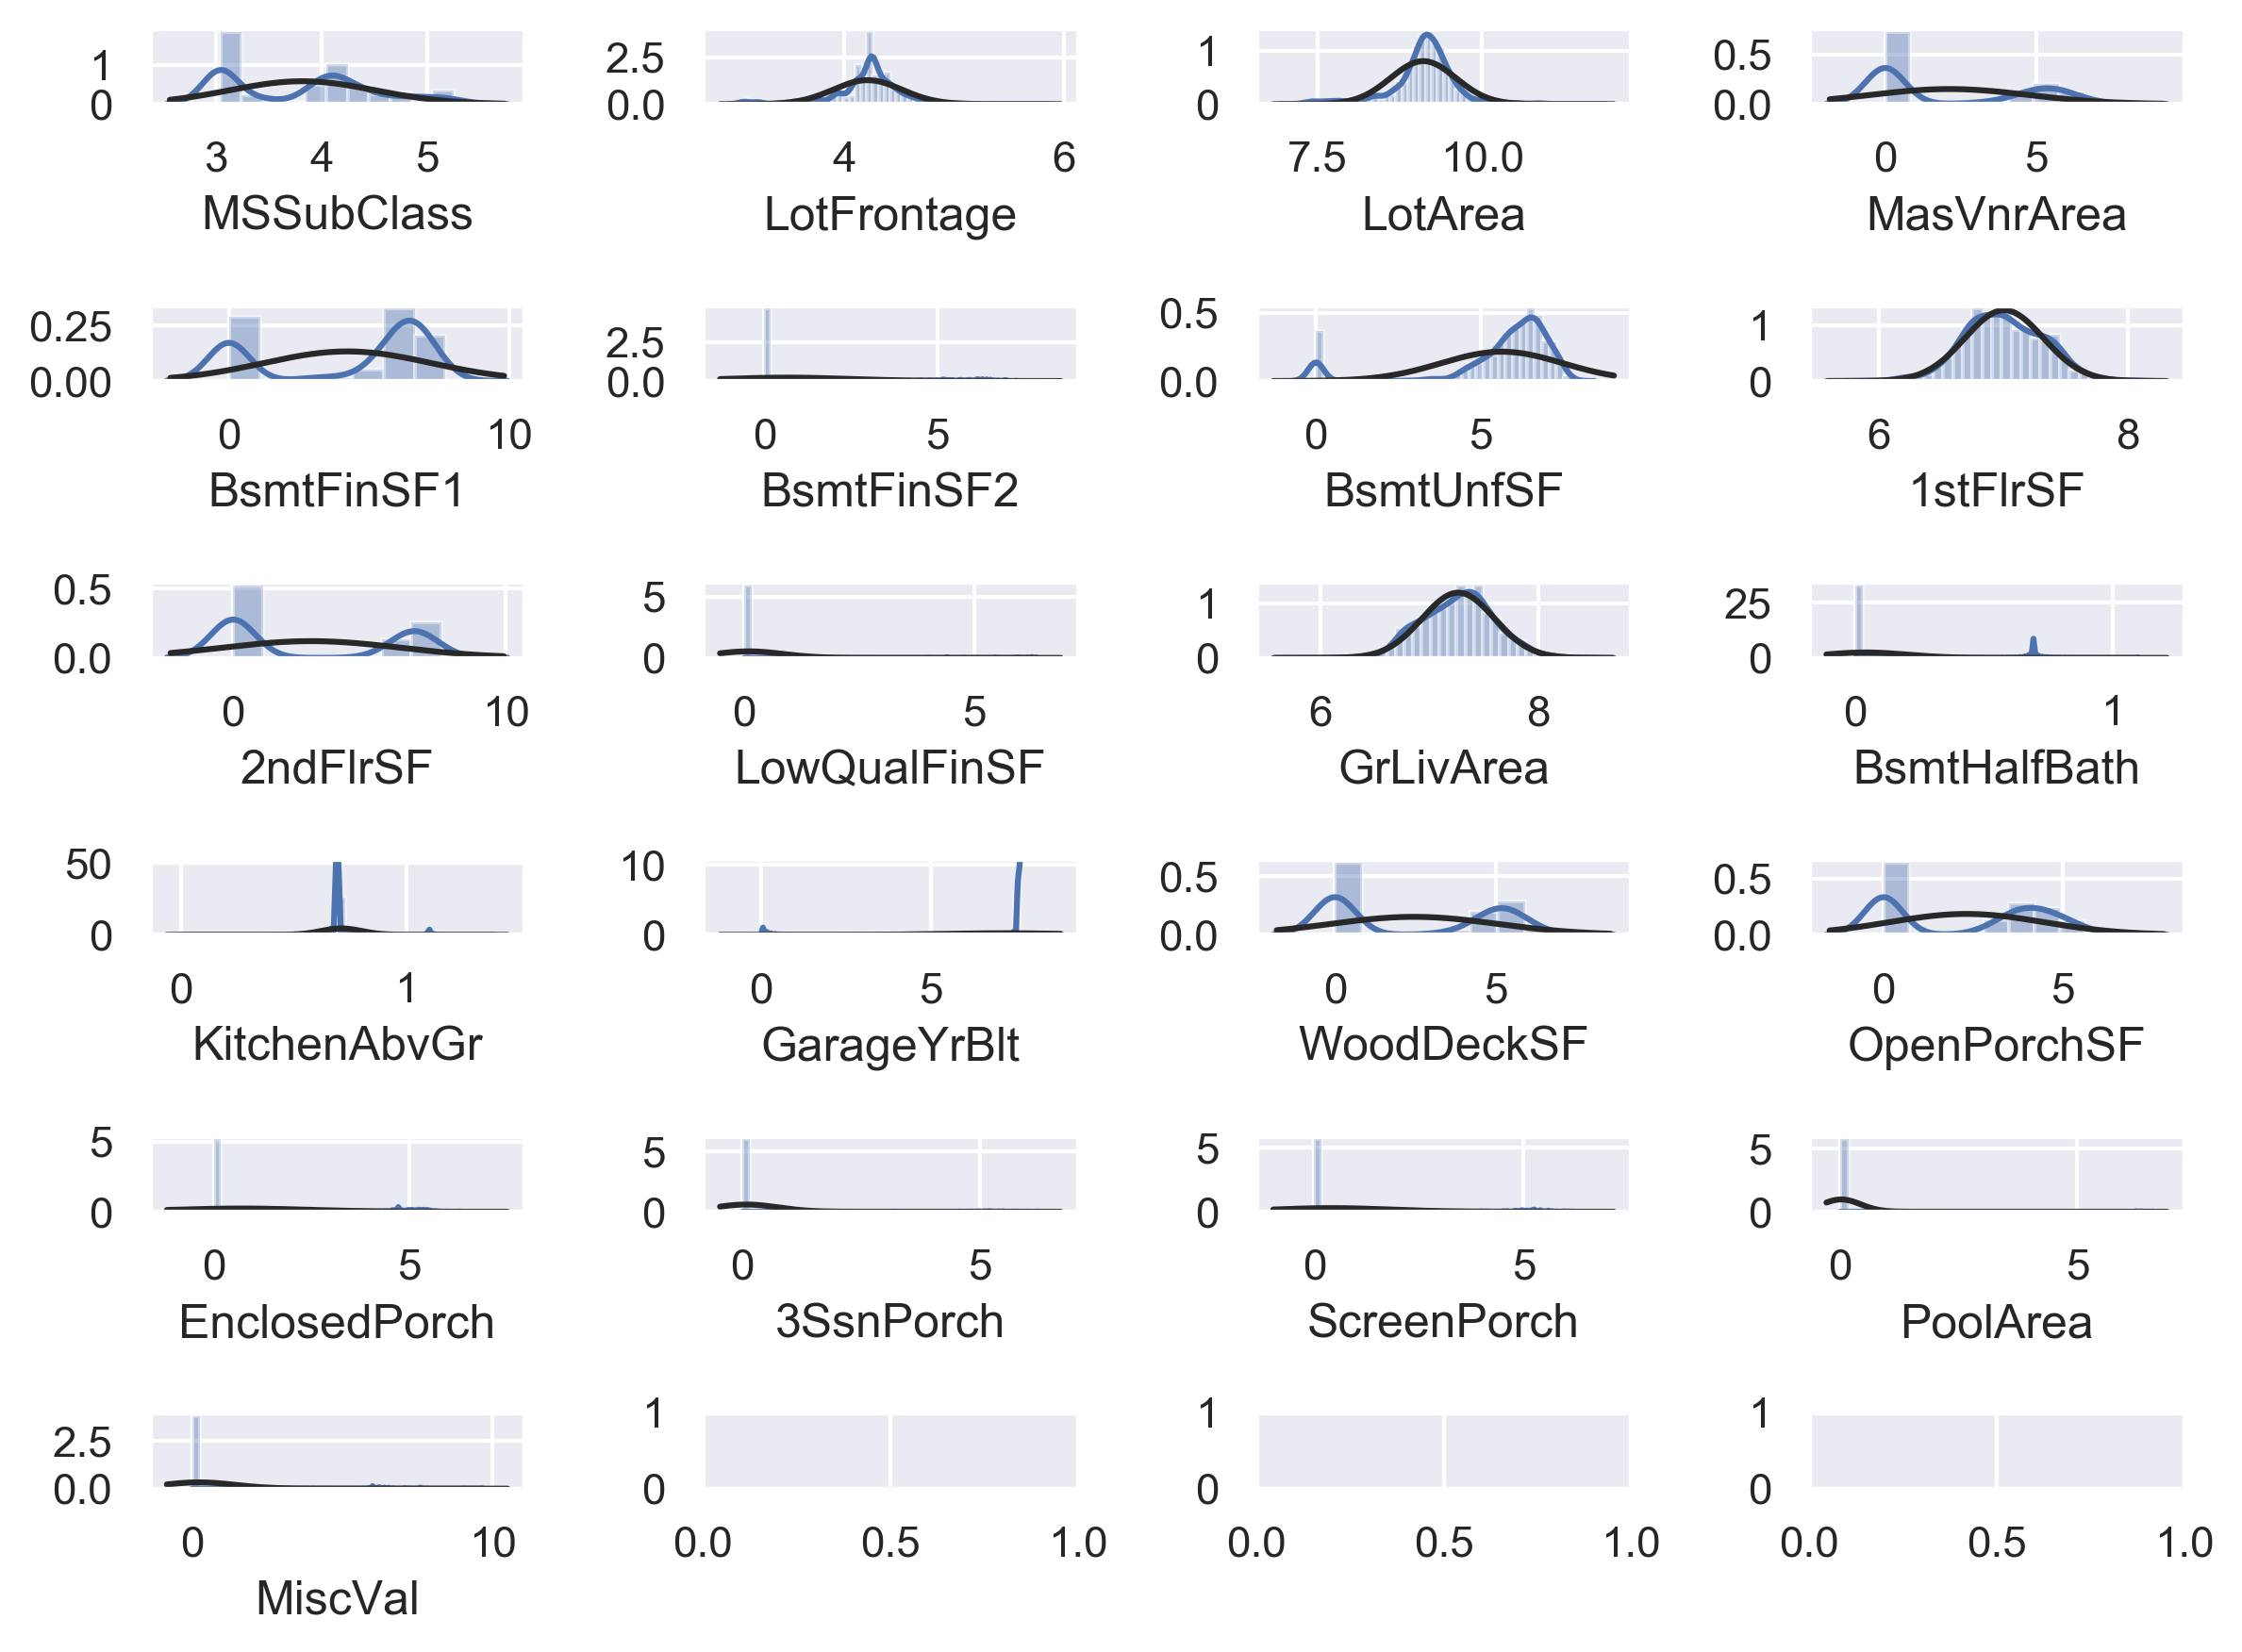

In [358]:
#Remove Skewness from numerical atributes
def distplot(df, cols, ncols):
    nrows = ceil(len(cols) / ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 6), dpi=300)
    for idx in range(0, len(cols)):
        x = (int) (idx / ncols)
        y = (int) (idx % ncols)
        attr = cols[idx]
        sns.distplot(df[attr], fit=norm, ax=axes.item((x, y)))
    plt.tight_layout()

num_feats = df_train.dtypes[df_train.dtypes != "object"].index
df_skew = df_train[num_feats].apply(lambda x: stats.skew(x.astype('float')))
# Filtering highly skewed features
df_skew = df_skew[abs(df_skew) > 0.75]
# before transformation
distplot(df_train, df_skew.index, 4)

for col in df_skew.index:
    df_train[col] = np.log1p(df_train[col])

# after transformation
distplot(df_train, df_skew.index, 4)

C:\Users\Preet\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
C:\Users\Preet\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
C:\Users\Preet\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

C:\Users\Preet\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
C:\Users\Preet\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


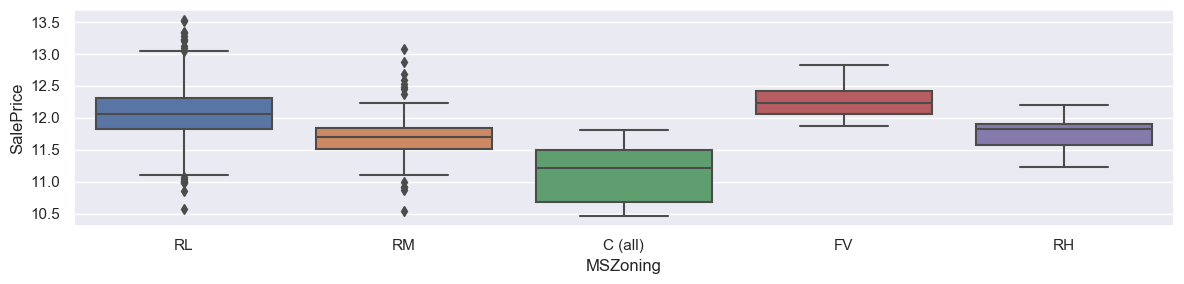

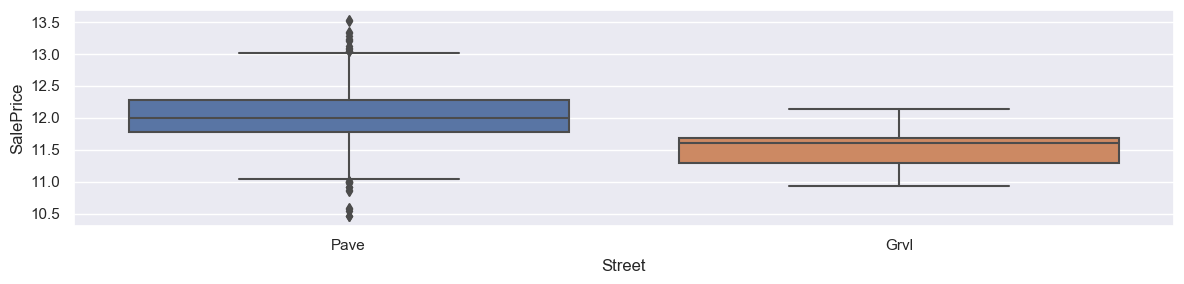

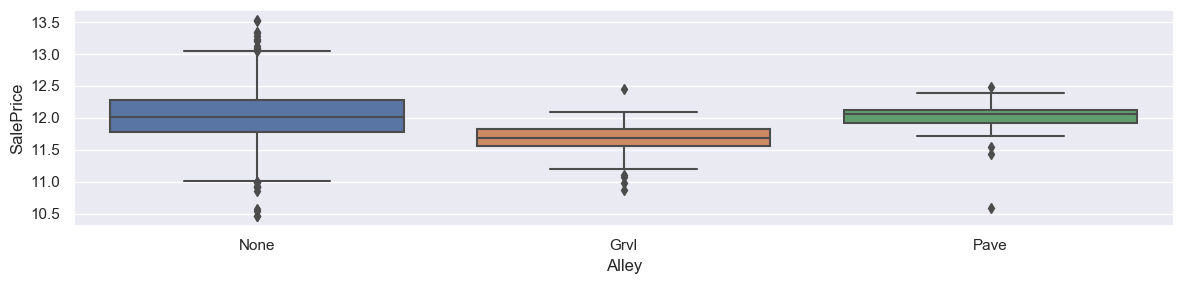

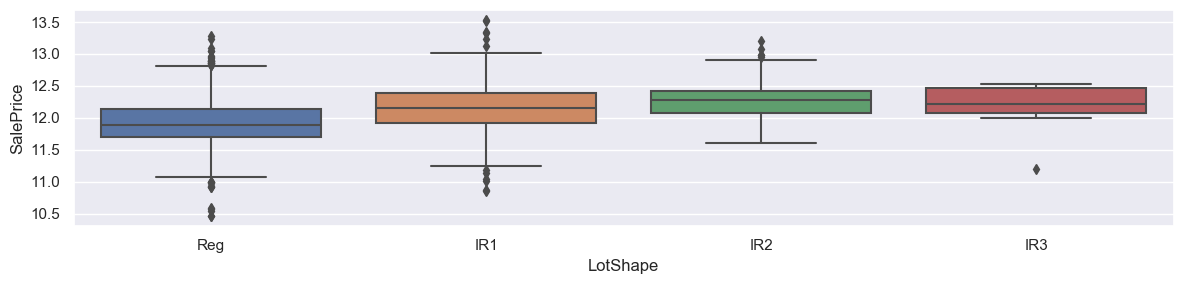

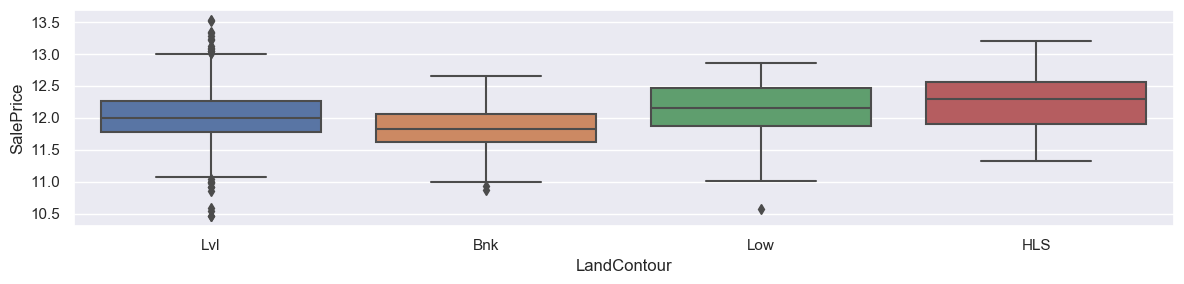

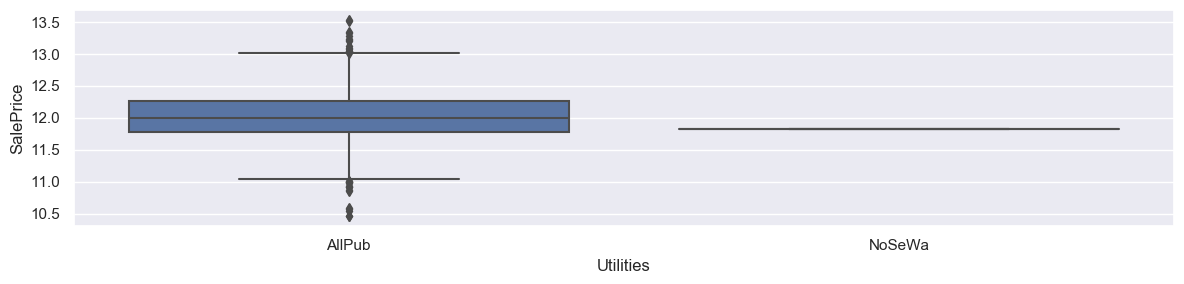

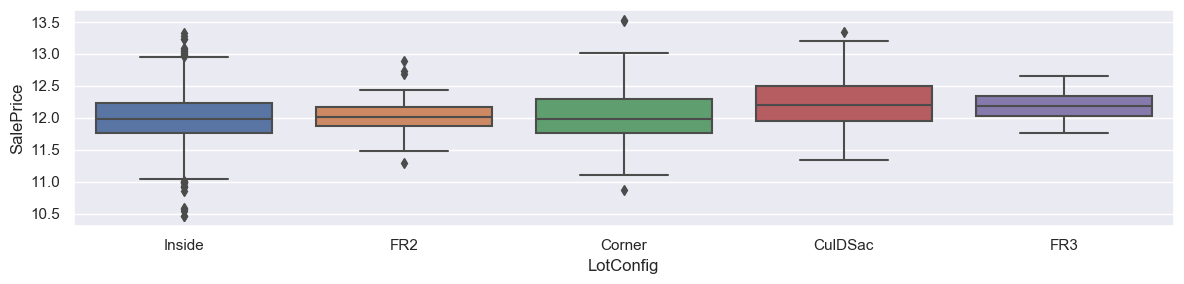

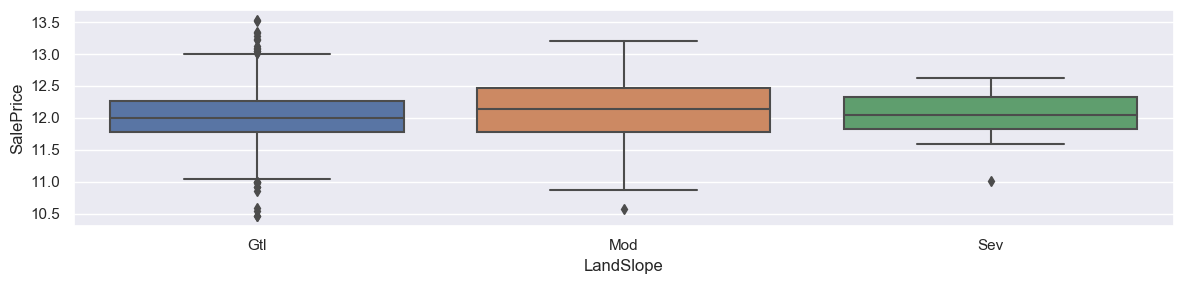

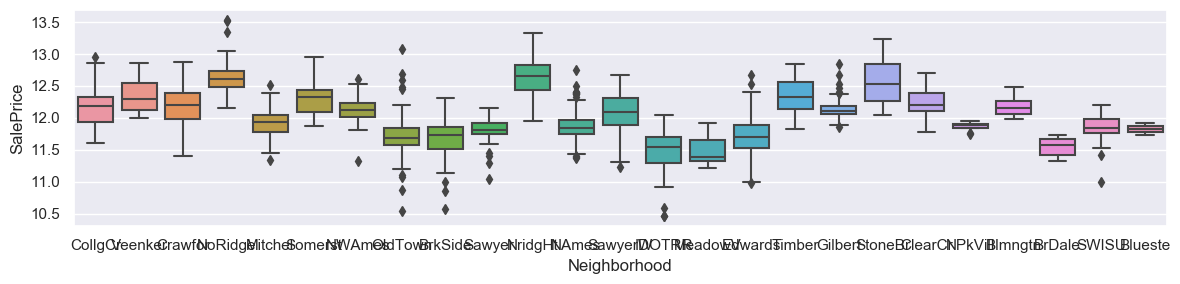

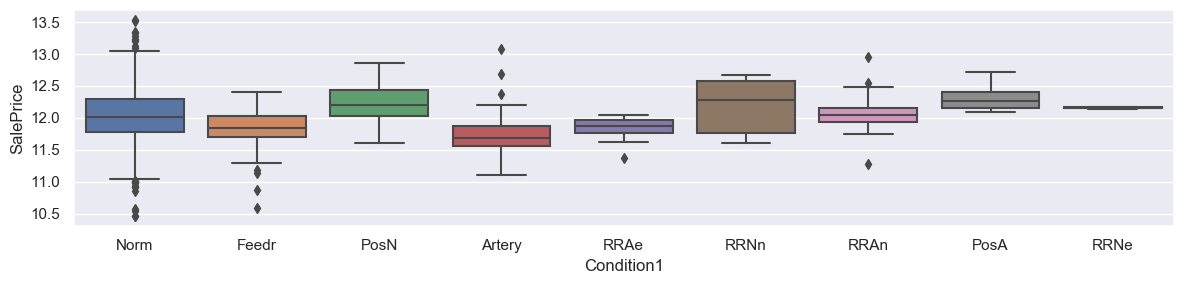

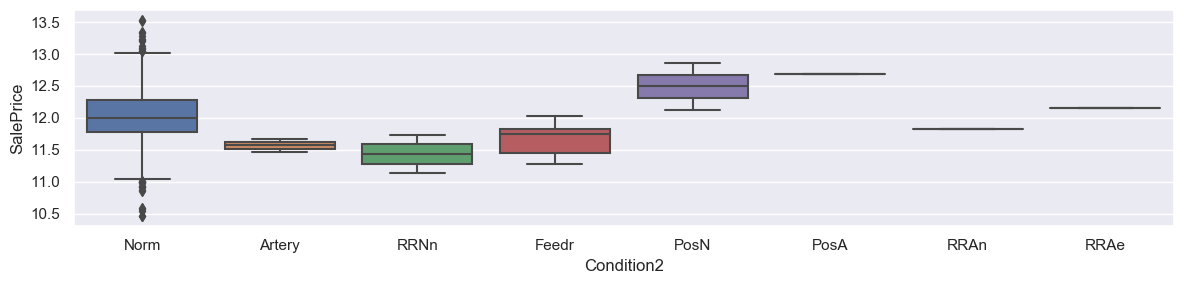

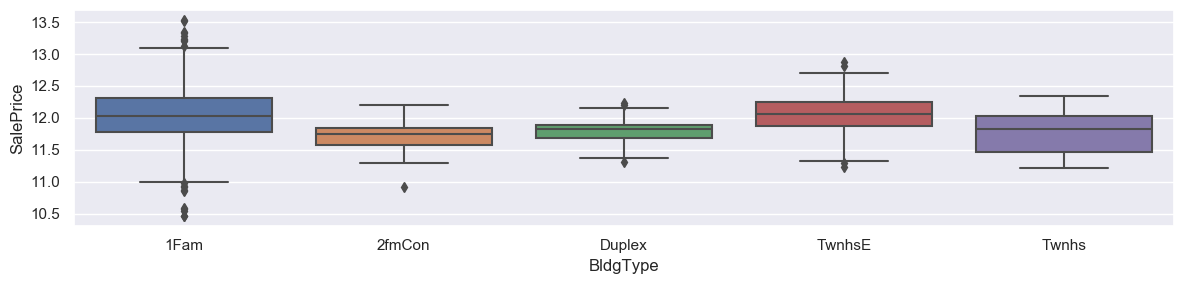

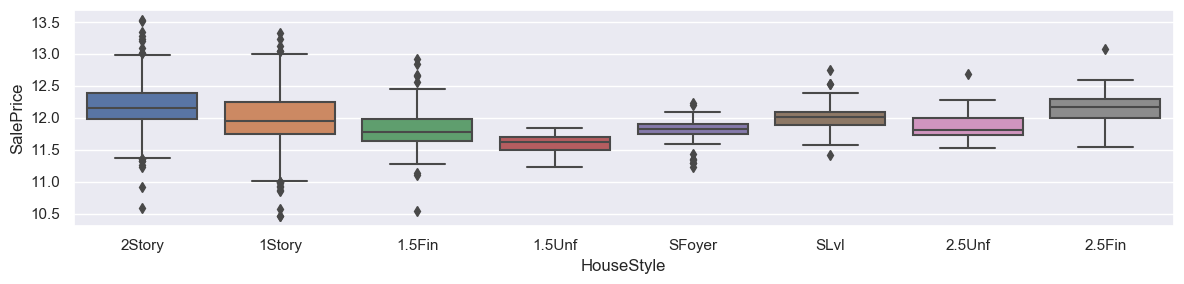

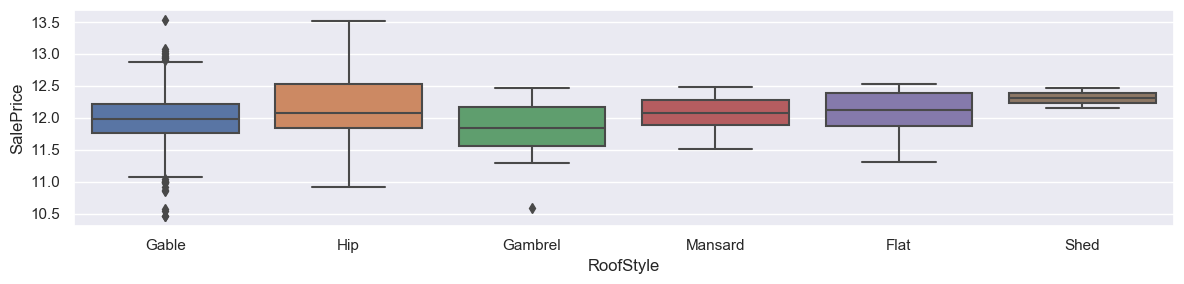

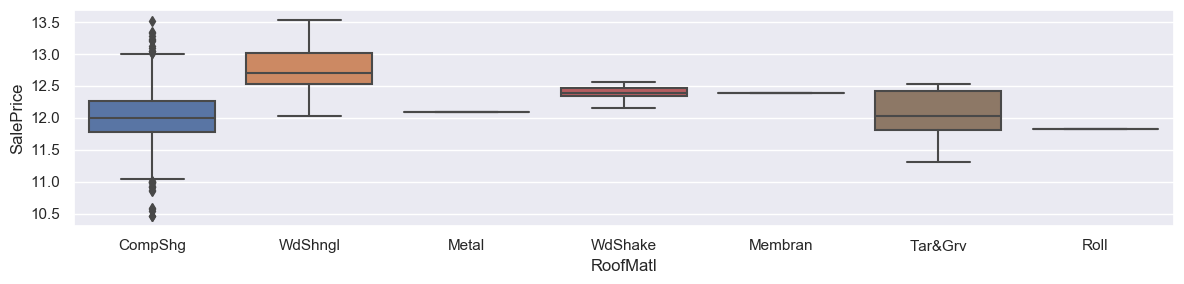

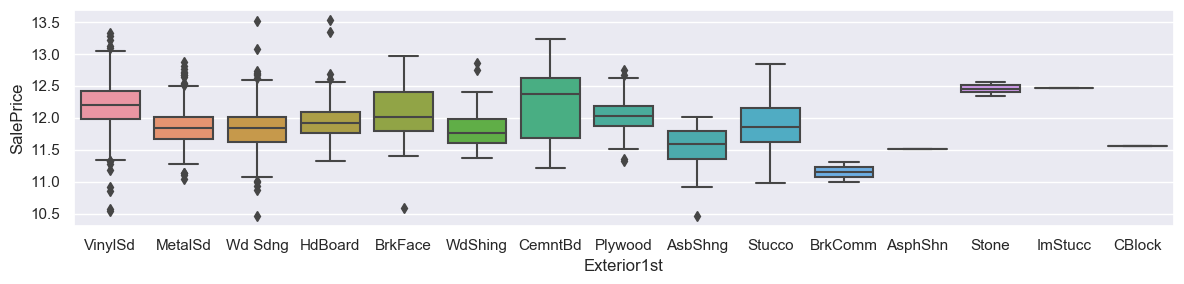

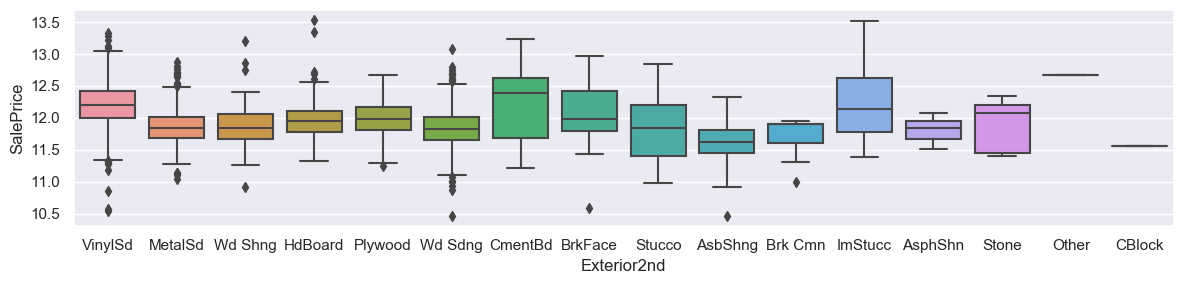

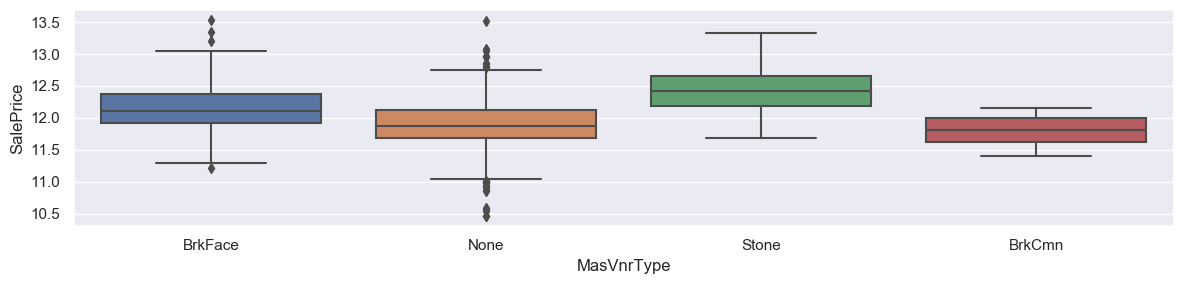

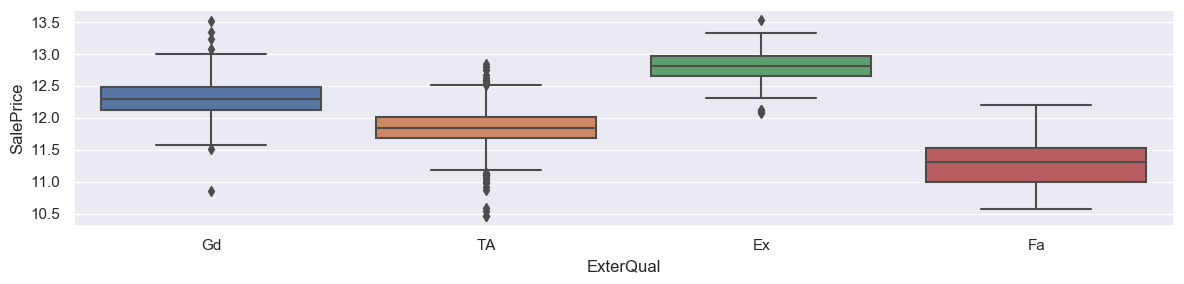

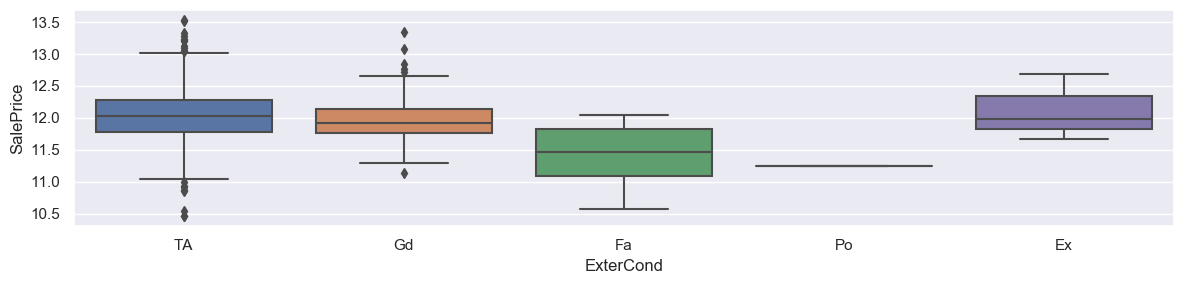

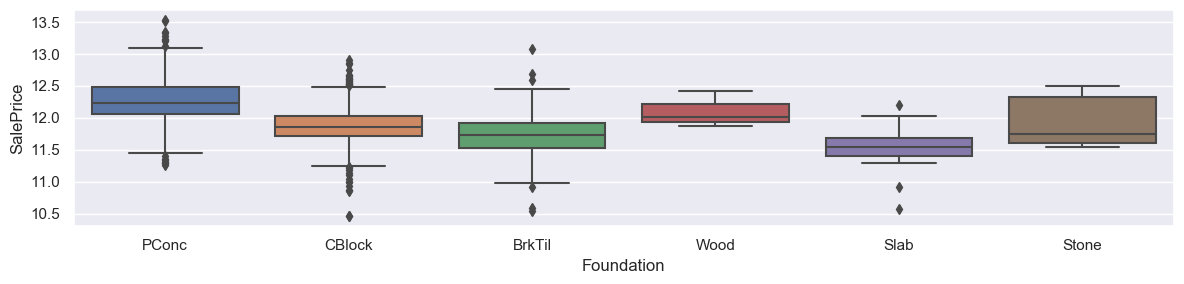

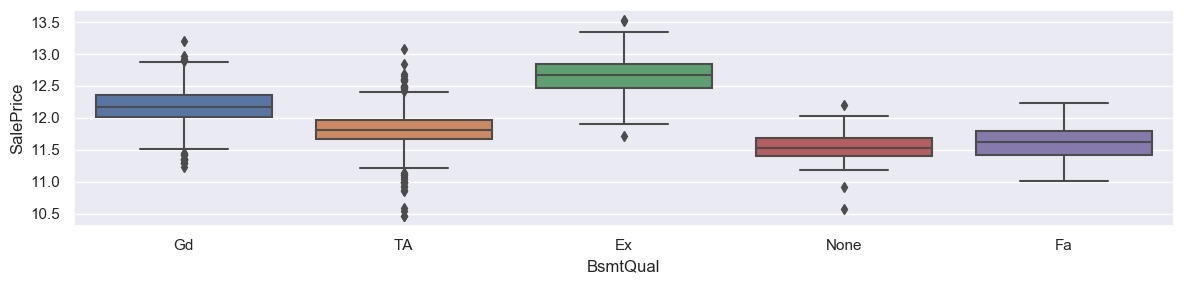

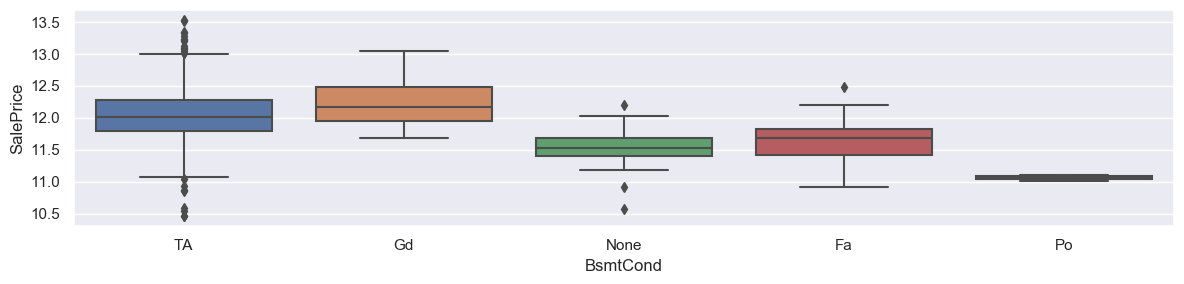

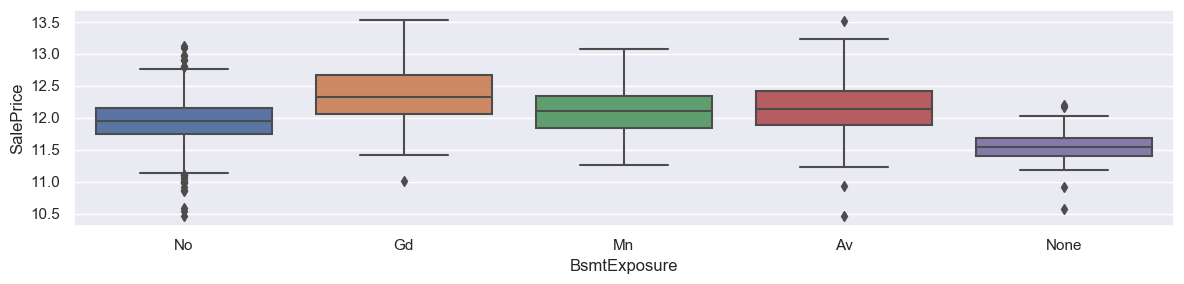

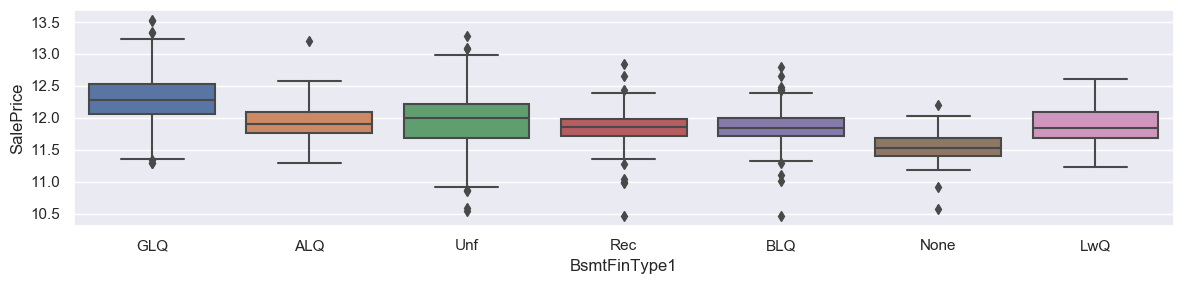

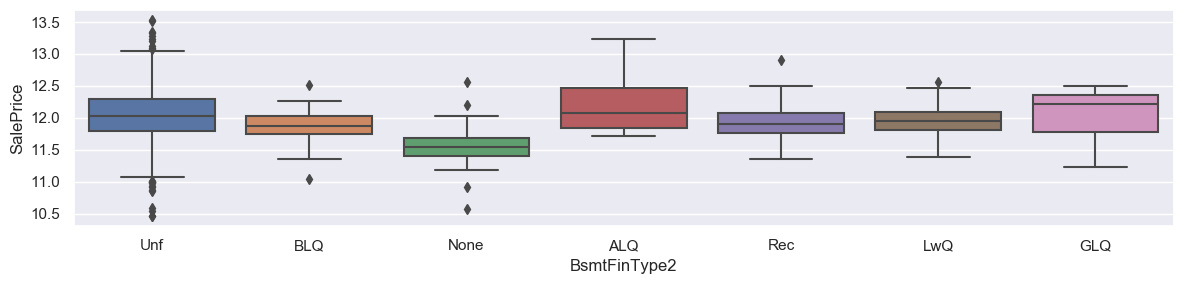

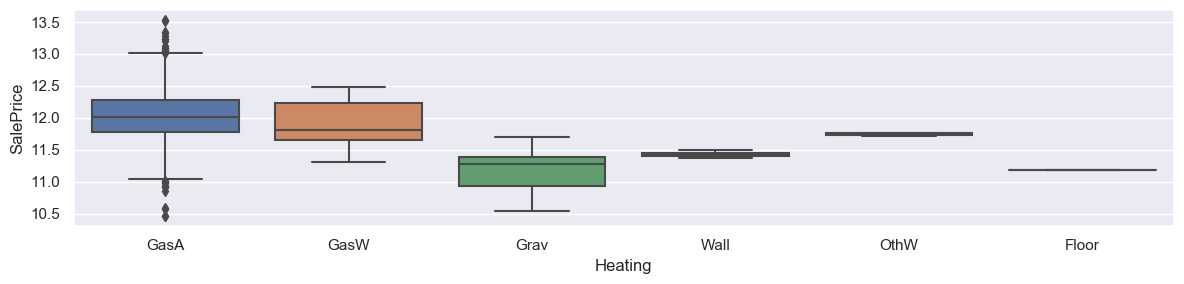

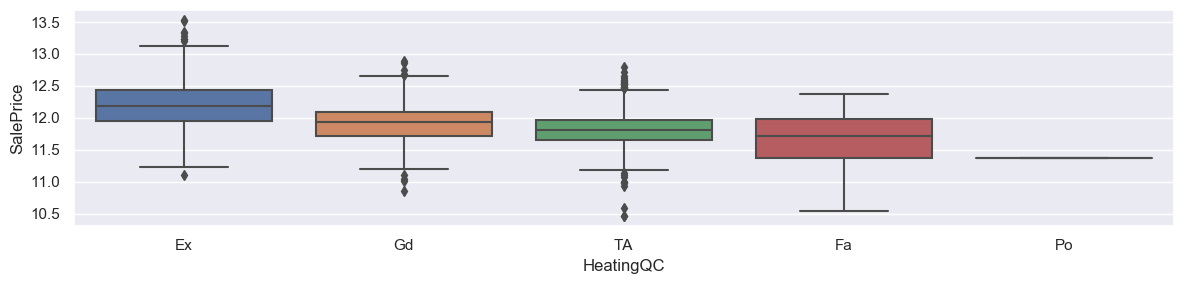

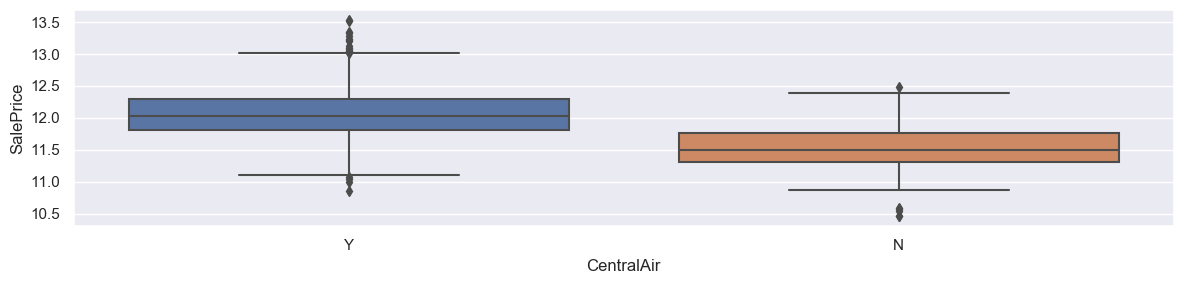

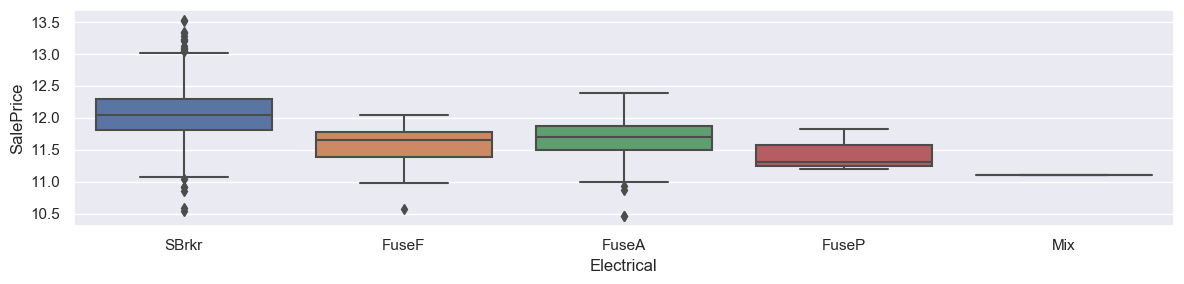

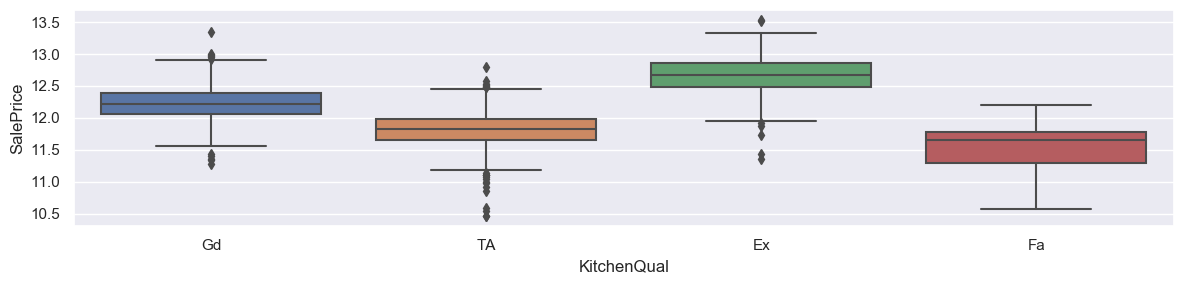

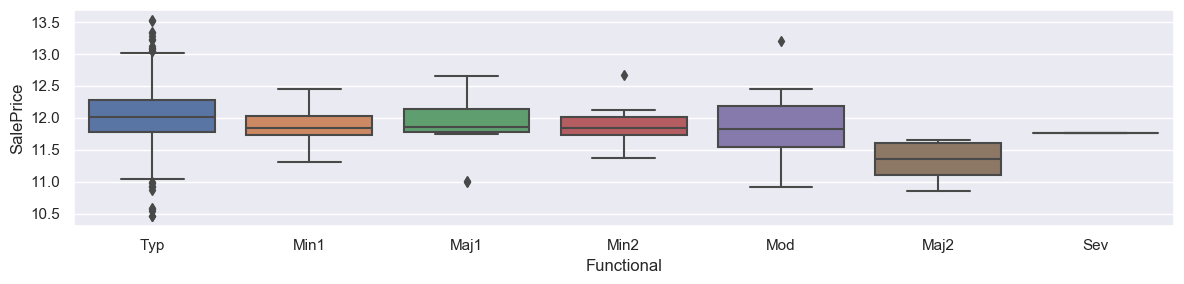

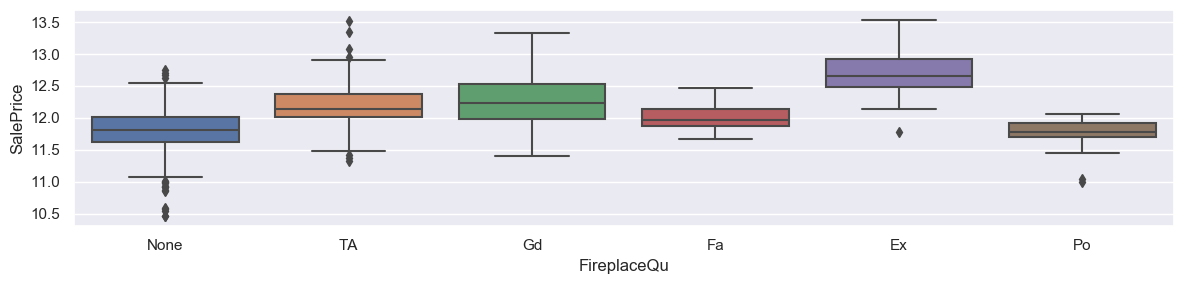

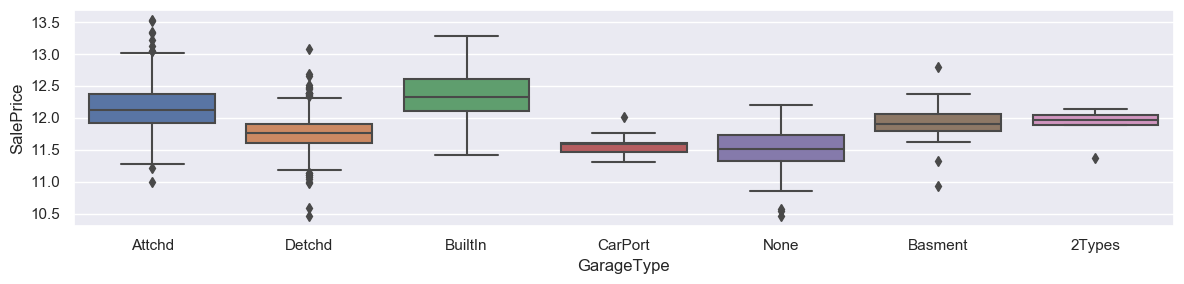

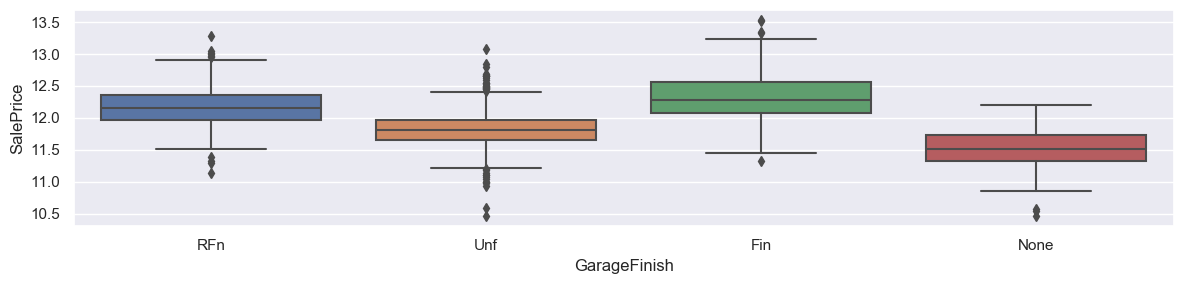

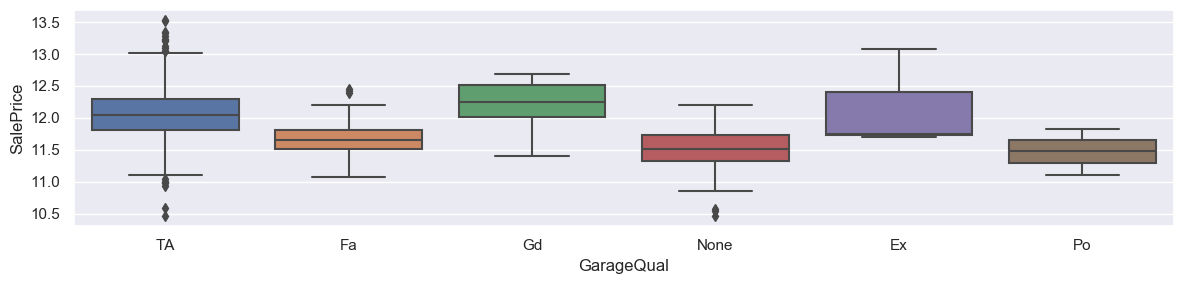

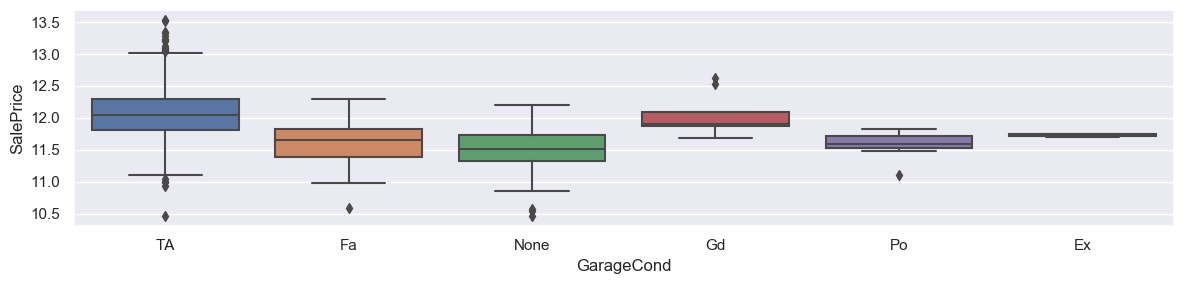

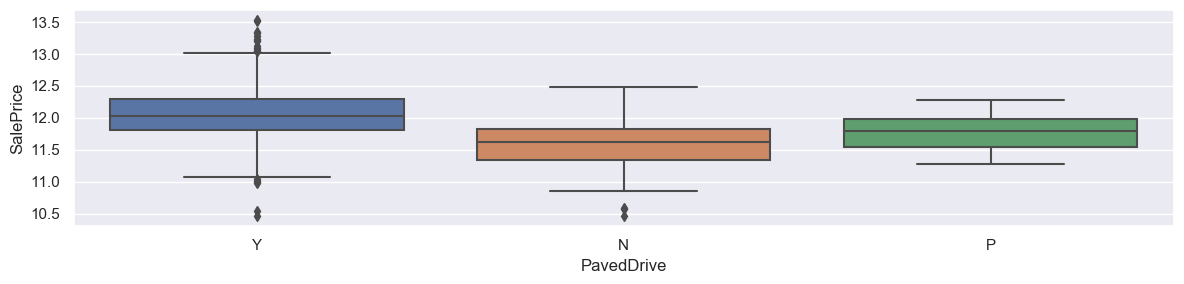

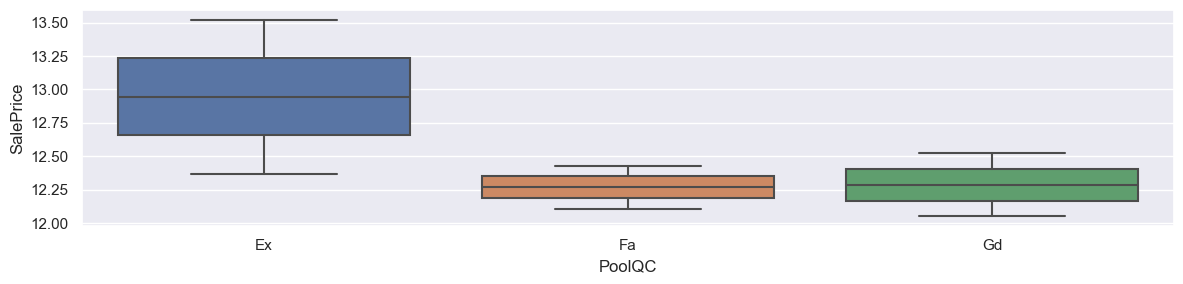

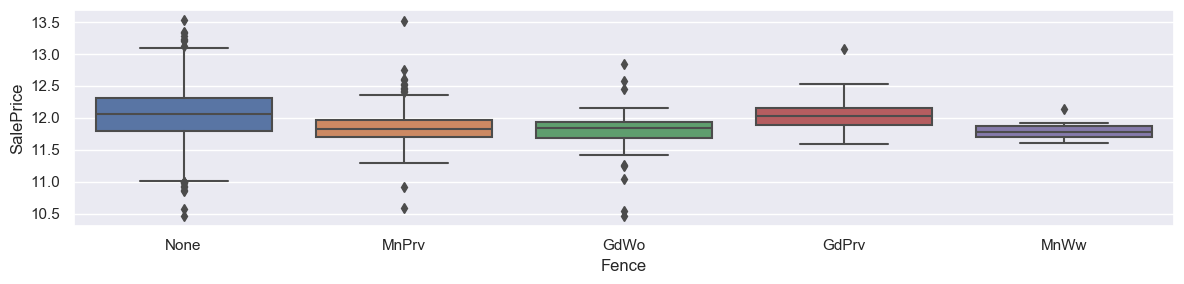

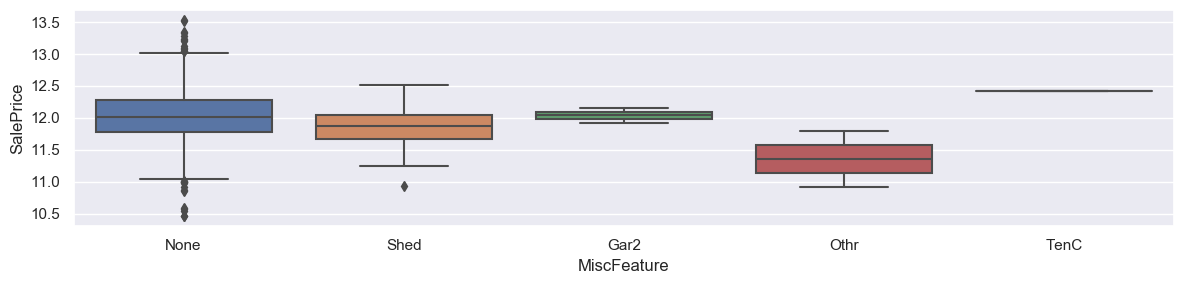

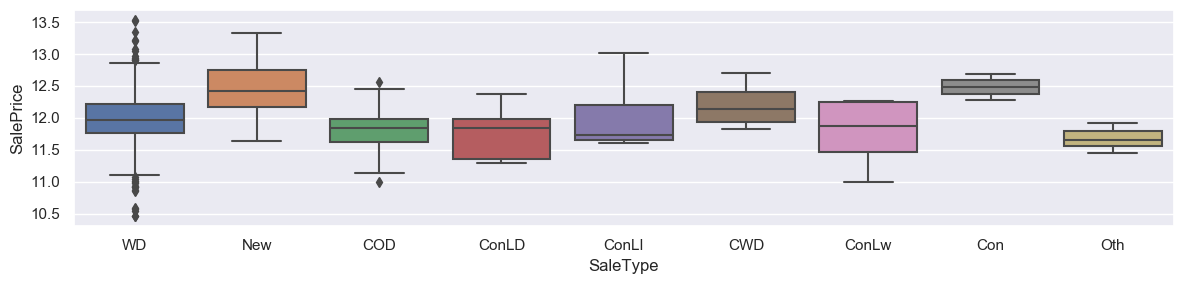

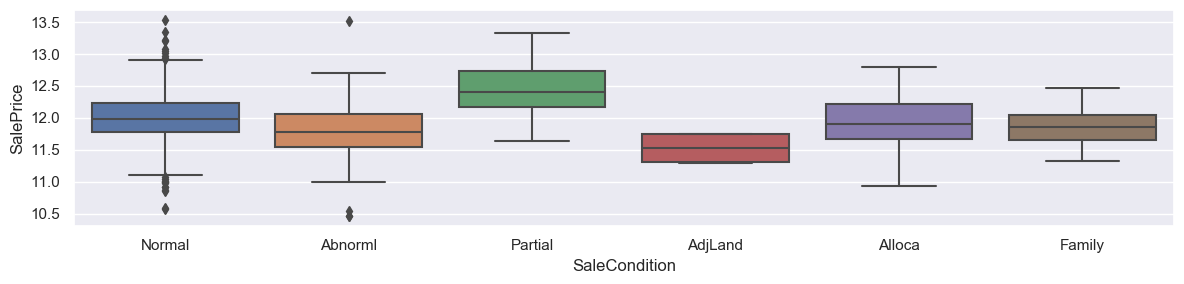

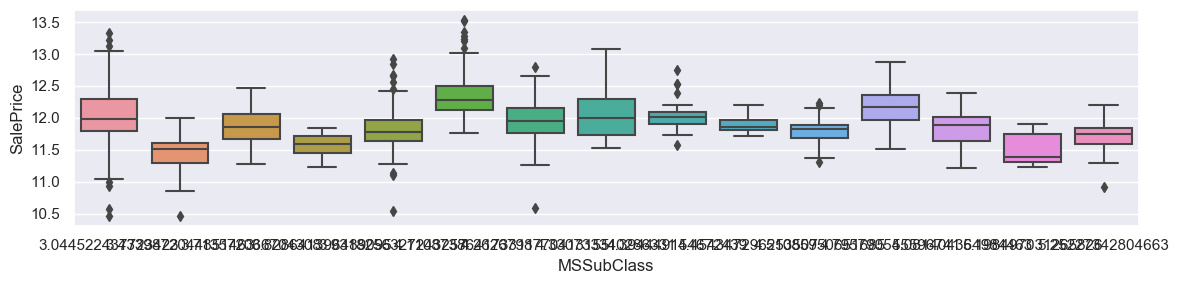

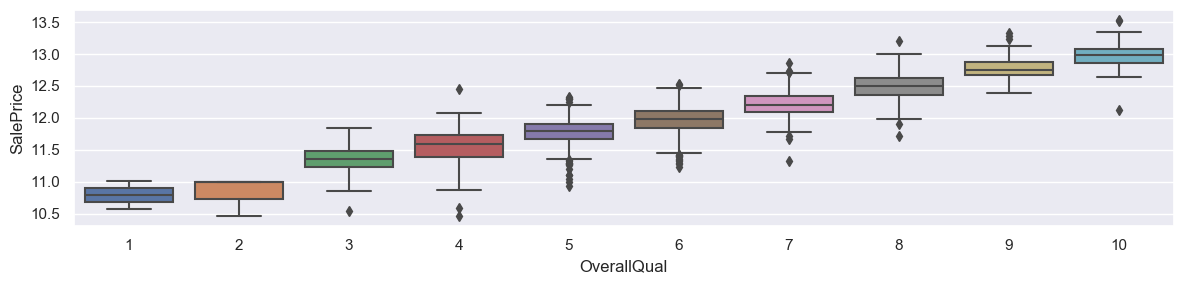

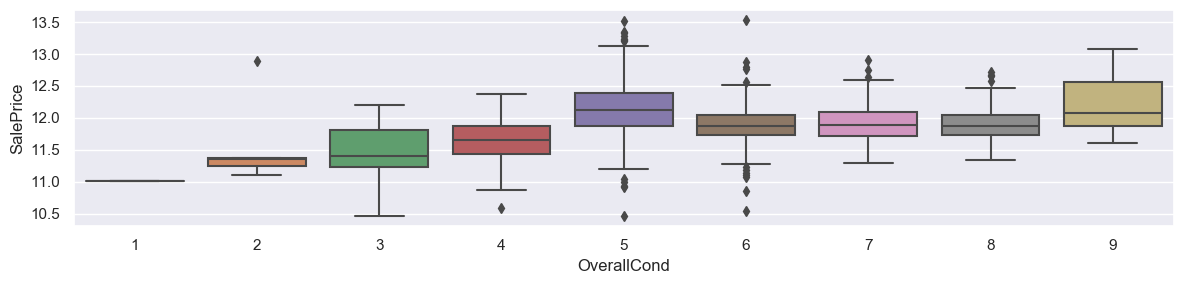

In [362]:
# categorical attributes
categorical = ["MSZoning", "Street", "Alley", "LotShape", "LandContour", 
               "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1",
               "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl",
               "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond",
               "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
               "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical",
               "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish",
               "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature",
               "SaleType", "SaleCondition", "MSSubClass", "OverallQual", "OverallCond"]
def boxplot(df, cols):
    for i in range(0, len(cols)):
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 3), dpi=100)
        attr = cols[i]
        data = pd.concat([df['SalePrice'], df[attr]], axis=1)
        sns.boxplot(x=attr, y='SalePrice', data=data)
        plt.tight_layout()

boxplot(df_train, categorical)

In [363]:
# Dropping Features

df_train.drop(['Utilities','SaleType','Condition2','Heating','RoofMatl','Street'],axis=1,inplace=True)

In [364]:
#Correlations of remaining attributes
corr_df=df_train.corr()
corr_df_new=corr_df[corr_df>0.7]

In [365]:
corr_df_new

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.821305
OverallCond,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [366]:
drops = ["BldgType", "ExterQual", "GarageYrBlt", "Exterior2nd", "KitchenQual", 
         "1stFlrSF", "TotRmsAbvGrd", "FireplaceQu", "GarageCars", "GarageCond"]
df_train = df_train.drop(drops, axis=1)

In [448]:
df_train.shape

(1456, 63)

In [450]:
df_train_new=pd.get_dummies(df_train)

In [452]:
df_train_new

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.000000,5.017280,856,6.751101,0.0,7.444833,1,0.000000,2,1,3,0.693147,0,548,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,2,2008,12.247699,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1

In [453]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_train_new.drop(['SalePrice'],axis=1),df_train_new[['SalePrice']], test_size = 0.2, random_state = 10)

In [508]:
models = ["LinearRegression",  
          "RandomForest", 
          "Lasso",
          "GradientBoosting",
          "SupportVectorMachine"
         ]
train_rmses = {}
test_rmses = {}
r2score_train = {}
r2score_test = {}


In [454]:
from sklearn import linear_model
X_train= np.asanyarray(X_train)
Y_train= np.asanyarray(y_train)
#Y_train = Y_train.ravel()
lin_model_new = linear_model.LinearRegression()
lin_model_new.fit (X_train, Y_train)
# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[-8.62539625e-03  1.02558583e-02  8.92319247e-02  4.22202202e-02
   4.10347970e-02  1.58509470e-03  7.19422067e-04 -2.57291742e-03
   1.37598959e-02 -4.30078576e-03 -3.60207768e-03  5.67126093e-05
  -3.81781251e-03 -1.05649959e-02  4.57038170e-01  2.22202662e-02
   5.64484291e-03  1.44984069e-02  2.26561475e-02  4.42136302e-03
  -1.96840620e-01  1.99941205e-02  1.47527308e-04  4.04202345e-03
  -1.61852673e-04 -3.93758454e-05  8.73830913e-03  8.59534309e-03
   4.05656289e-02 -3.97108658e-04 -1.37255355e-03 -3.87645910e-03
  -3.09716935e-01  6.91744956e-02  9.72550298e-02  8.23622943e-02
   6.09251154e-02 -6.76961641e-03 -8.66560836e-03  1.54352248e-02
  -2.61918470e-03  1.24899992e-02 -9.69279601e-03 -1.78018457e-04
  -3.79311727e-02  2.97055283e-02 -4.33914809e-04  8.65955927e-03
   2.80005841e-02  4.48078493e-02 -2.33567336e-02 -6.16671052e-02
   1.22154054e-02  6.49763713e-02  7.14477294e-02 -1.36424101e-01
   2.65883380e-02 -4.22912890e-02 -2.70608804e-02  3.12432764

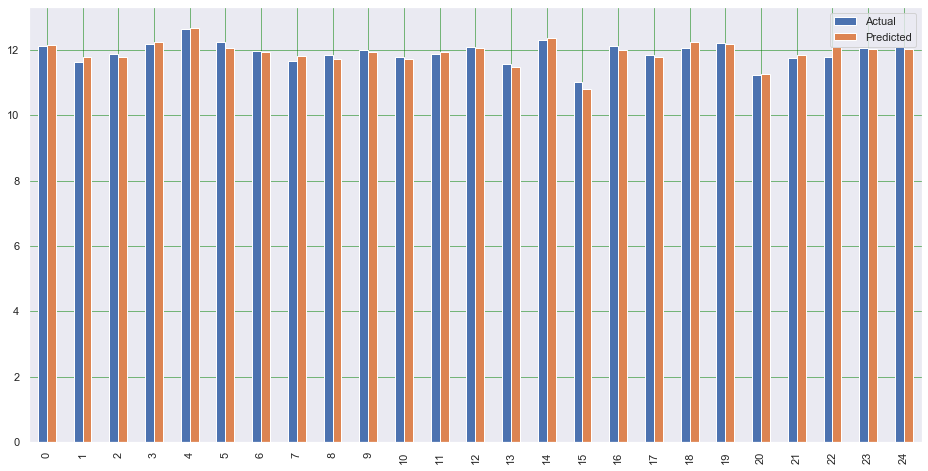

In [509]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X_test= np.asanyarray(X_test)
Y_test= np.asanyarray(y_test)

y_train_hat = lin_model_new.predict(X_train)
y_test_hat = lin_model_new.predict(X_test)

#Plotting the actual and predicted values
df_linear = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_test_hat.flatten()})
df1 = df_linear.head(25)
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

train_mse = mean_squared_error(Y_train, y_train_hat)
test_mse = mean_squared_error(Y_test, y_test_hat)

train_rmse=np.sqrt(((y_train_hat - Y_train) ** 2).mean())
test_rmse=np.sqrt(((y_test_hat - Y_test) ** 2).mean())

train_r2score=r2_score(Y_train, y_train_hat)
test_r2score=r2_score(Y_test, y_test_hat)

train_rmses["LinearRegression"], test_rmses["LinearRegression"] = train_rmse, test_rmse
r2score_train["LinearRegression"], r2score_test["LinearRegression"] = train_r2score, test_r2score

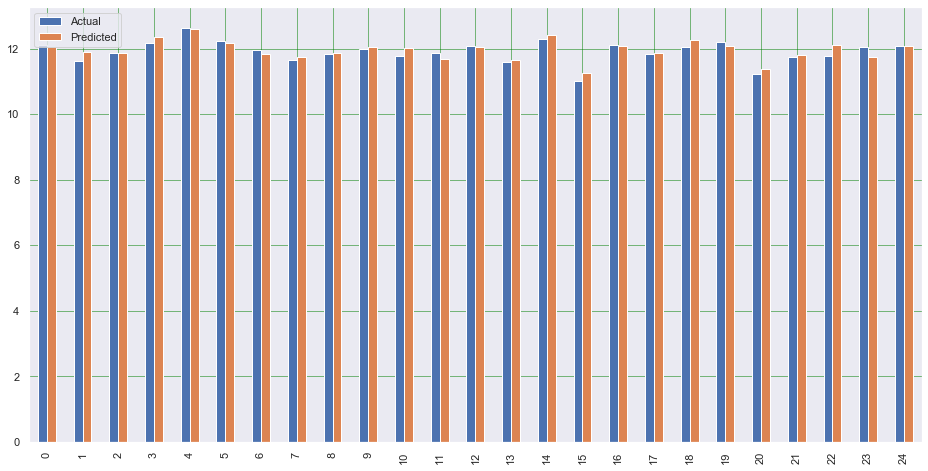

In [510]:
from sklearn.ensemble import RandomForestRegressor 
  
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42) 
  
regressor.fit(X_train, Y_train.ravel())

y_train_hat = regressor.predict(X_train)
y_test_hat = regressor.predict(X_test)

#Plotting the actual and predicted values
df_forest = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_test_hat.flatten()})
df1 = df_forest.head(25)
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

train_mse = mean_squared_error(Y_train, y_train_hat)
test_mse = mean_squared_error(Y_test, y_test_hat)

train_rmse=np.sqrt(((y_train_hat - Y_train) ** 2).mean())
test_rmse=np.sqrt(((y_test_hat - Y_test) ** 2).mean())

train_r2score=r2_score(Y_train, y_train_hat)
test_r2score=r2_score(Y_test, y_test_hat)

train_rmses["RandomForest"], test_rmses["RandomForest"] = train_rmse, test_rmse
r2score_train["RandomForest"], r2score_test["RandomForest"] = train_r2score, test_r2score

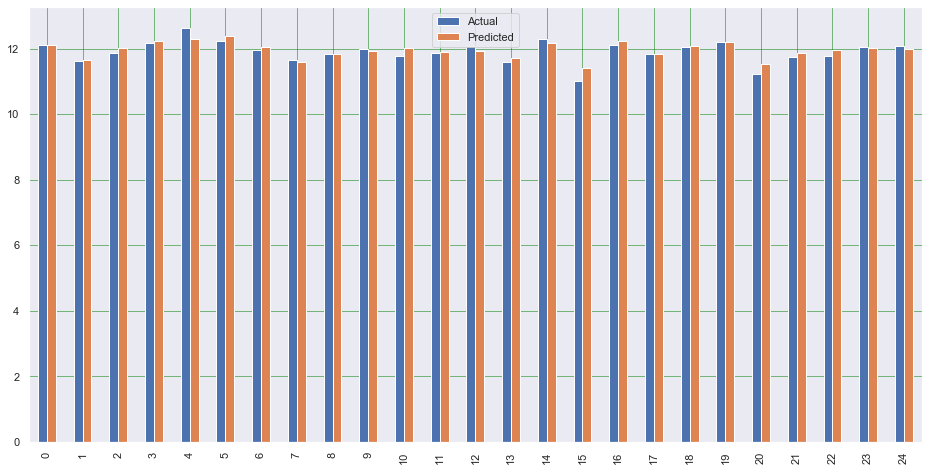

In [511]:
from sklearn.linear_model import Lasso 
  
lasso = Lasso() 
  
lasso.fit(X_train, Y_train.ravel())

y_train_hat = lasso.predict(X_train)
y_test_hat = lasso.predict(X_test)

#Plotting the actual and predicted values
df_lasso = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_test_hat.flatten()})
df1 = df_lasso.head(25)
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

train_mse = mean_squared_error(Y_train, y_train_hat)
test_mse = mean_squared_error(Y_test, y_test_hat)

train_rmse=np.sqrt(((y_train_hat - Y_train) ** 2).mean())
test_rmse=np.sqrt(((y_test_hat - Y_test) ** 2).mean())

train_r2score=r2_score(Y_train, y_train_hat)
test_r2score=r2_score(Y_test, y_test_hat)

train_rmses["Lasso"], test_rmses["Lasso"] = train_rmse, test_rmse
r2score_train["Lasso"], r2score_test["Lasso"] = train_r2score, test_r2score

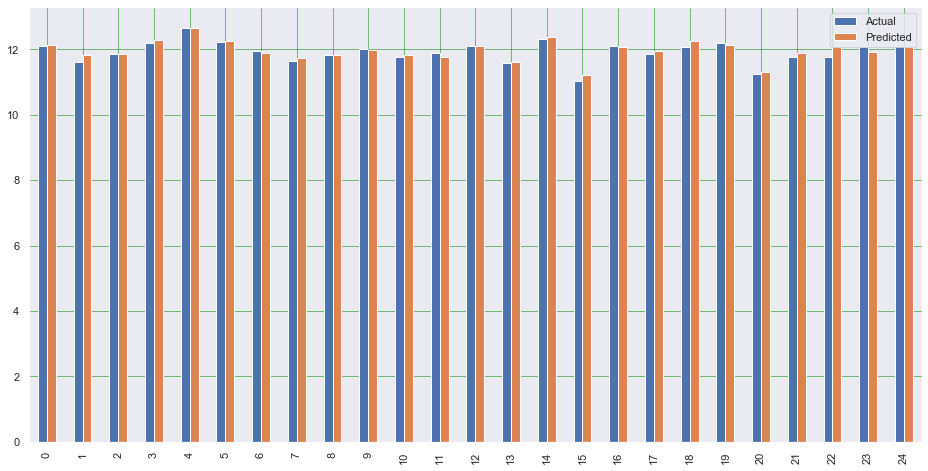

In [512]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(n_estimators = 100, random_state = 42) 
  
regressor.fit(X_train, Y_train.ravel())

y_train_hat = regressor.predict(X_train)
y_test_hat = regressor.predict(X_test)

#Plotting the actual and predicted values
df_gradient = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_test_hat.flatten()})
df1 = df_gradient.head(25)
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

train_mse = mean_squared_error(Y_train, y_train_hat)
test_mse = mean_squared_error(Y_test, y_test_hat)

train_rmse=np.sqrt(((y_train_hat - Y_train) ** 2).mean())
test_rmse=np.sqrt(((y_test_hat - Y_test) ** 2).mean())

train_r2score=r2_score(Y_train, y_train_hat)
test_r2score=r2_score(Y_test, y_test_hat)

train_rmses["GradientBoosting"], test_rmses["GradientBoosting"] = train_rmse, test_rmse
r2score_train["GradientBoosting"], r2score_test["GradientBoosting"] = train_r2score, test_r2score

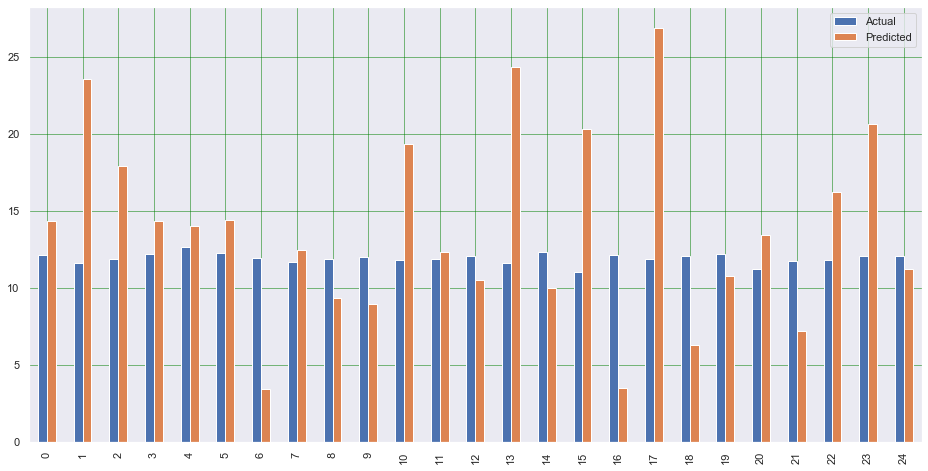

In [513]:
from sklearn.svm import SVR
regressor = SVR(kernel='linear')
regressor.fit(X_train, Y_train.ravel())

y_train_hat = regressor.predict(X_train)
y_test_hat = regressor.predict(X_test)


#Plotting the actual and predicted values
df_svm = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_test_hat.flatten()})
df1 = df_svm.head(25)
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


train_mse = mean_squared_error(Y_train, y_train_hat)
test_mse = mean_squared_error(Y_test, y_test_hat)

train_rmse=np.sqrt(((y_train_hat - Y_train) ** 2).mean())
test_rmse=np.sqrt(((y_test_hat - Y_test) ** 2).mean())

train_r2score=r2_score(Y_train, y_train_hat)
test_r2score=r2_score(Y_test, y_test_hat)

train_rmses["SupportVectorMachine"], test_rmses["SupportVectorMachine"] = train_rmse, test_rmse
r2score_train["SupportVectorMachine"], r2score_test["SupportVectorMachine"] = train_r2score, test_r2score

In [515]:
perf = pd.DataFrame({"model": models})
perf["Train.RMSE"] = train_rmses.values()
perf["Test.RMSE"] = test_rmses.values()
perf["Train.R2SCORE"] = r2score_train.values()
perf["Test.R2SCORE"] = r2score_test.values()
perf

,model,Train.RMSE,Test.RMSE,Train.R2SCORE,Test.R2SCORE
0,LinearRegression,0.552380,0.119371,0.938464,0.914228
1,RandomForest,0.053756,0.544695,0.981641,0.866035
2,Lasso,0.236761,0.501748,0.643877,0.682955
3,GradientBoosting,0.075954,0.555586,0.963349,0.910311
4,SupportVectorMachine,5.242529,5.587121,-173.607581,-188.160580
